# DEVANAGARI SCRIPT RECOGNITION

### **About Data**
The dataset has been sourced from https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset.

This is an image database of Handwritten Devanagari characters. There are 46 classes (36 alphabets and 10 numerals) of characters with 300 examples each.

Image Format: .png<br>
Resolution: 32 by 32

### **About Project**
**Google Colab jupyter notebook is used for the project**<br>
**The code is written using fastai library built on Pytorch**<br>
**Transfer Learning has been applied using ResNet34 model**

In [ ]:
from fastai.vision import *
import numpy as np

### Importing data

In [ ]:
proj_path = '/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/Test'

In [ ]:
p_path = Path(proj_path)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

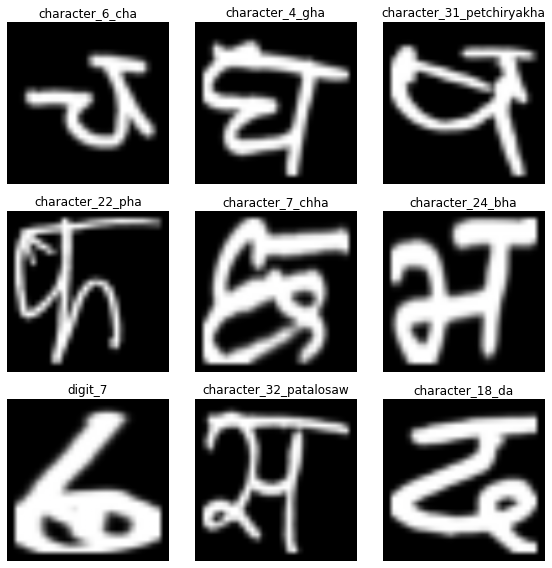

In [ ]:
data.show_batch(rows=3,figsize=(8,8))

In [9]:
data.c, len(data.train_ds), len(data.valid_ds)

(46, 11040, 2760)

### Importing ResNet model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


### Training the model on our data

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.644322,0.559071,0.165580,01:01
1,0.580894,0.292316,0.086232,01:01
2,0.286094,0.197205,0.059420,01:01
3,0.172108,0.178505,0.056884,01:00


In [ ]:
learn.save('model5_34', return_path=True)

PosixPath('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/Test/models/model5_34.pth')

In [ ]:
learn.save('model3_34')

In [ ]:
learn.unfreeze()

### Estimating most appropriate learning rates

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


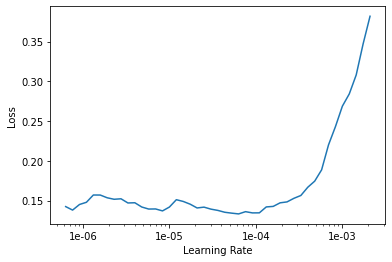

In [ ]:
learn.lr_find()
learn.recorder.plot()

### Training the model using most appropriate learning rates

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.134789,0.135518,0.039130,01:07
1,0.082800,0.123930,0.034420,01:07


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


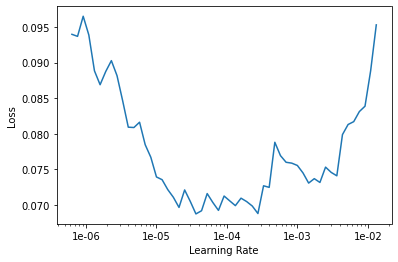

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.066090,0.119513,0.035145,01:01
1,0.061195,0.117833,0.032609,01:02


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


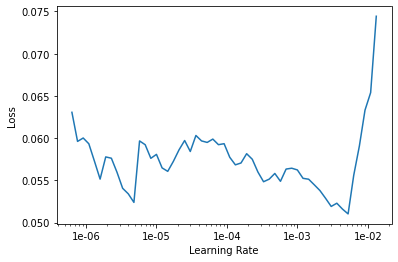

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model6_34')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

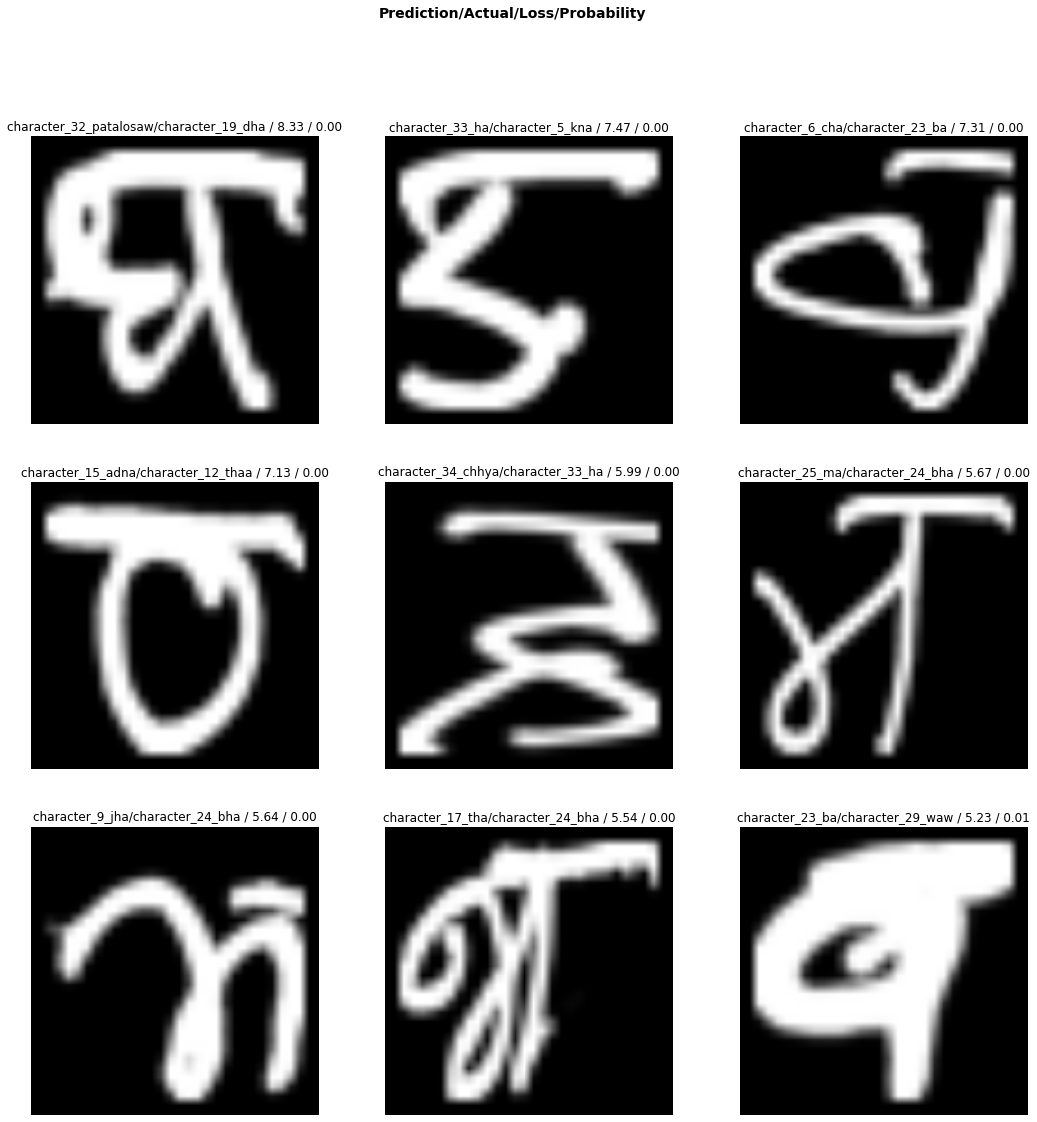

In [ ]:
interp.plot_top_losses(9, figsize=(18,18))

In [ ]:
interp.most_confused(min_val=2)

[('character_23_ba', 'character_29_waw', 3),
 ('character_17_tha', 'character_26_yaw', 2),
 ('character_18_da', 'character_14_dhaa', 2),
 ('character_19_dha', 'character_17_tha', 2),
 ('character_24_bha', 'character_25_ma', 2),
 ('character_24_bha', 'character_9_jha', 2),
 ('character_4_gha', 'character_26_yaw', 2),
 ('character_4_gha', 'character_7_chha', 2),
 ('character_5_kna', 'character_33_ha', 2),
 ('character_5_kna', 'character_7_chha', 2),
 ('character_8_ja', 'character_20_na', 2),
 ('digit_2', 'digit_3', 2)]

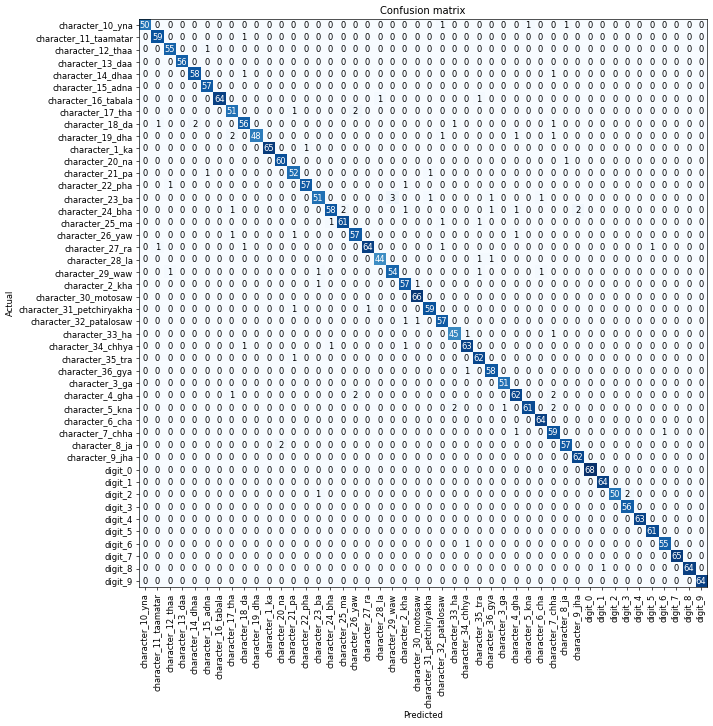

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Testing the model
### I used MS Paint to create images with 32x32 size
### Let's check how good is our model

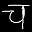

In [21]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-cha.png')
test_image

In [22]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_6_cha


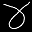

In [3]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-digit-4.png')
test_image

In [12]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

digit_4


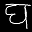

In [19]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-gha.png')
test_image

In [20]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_4_gha


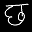

In [24]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-chha.png')
test_image

In [25]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_7_chha


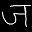

In [26]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-ja.png')
test_image

In [27]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_8_ja


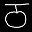

In [30]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-thaa.png')
test_image

In [31]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_12_thaa


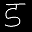

In [32]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-daa.png')
test_image

In [33]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_13_daa


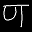

In [36]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-adna.png')
test_image

In [37]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_15_adna


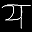

In [38]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-ya2.png')
test_image

In [39]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_26_yaw


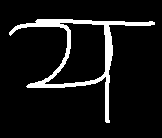

In [40]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-ya.png')
test_image

In [41]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

digit_8


### The model is pretty good in predicting characters but fails when the image size is not 32x32
### Using Python Image Library to resize the images

In [ ]:
from matplotlib import image
from PIL import Image

In [ ]:
pip install Pillow

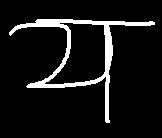

In [44]:
image = Image.open('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-ya.png')
image

In [ ]:
shrunk_image = image.resize((32, 32))
shrunk_image.save('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/shrunk2.png', 'PNG')

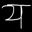

In [45]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/shrunk2.png')
test_image

In [46]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_26_yaw


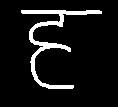

In [47]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-ha.png')
test_image

In [48]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

digit_9


In [ ]:
image = Image.open('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-ha.png')
shrunk_image = image.resize((32, 32))
shrunk_image.save('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/shrunk.png', 'PNG')


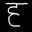

In [35]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/shrunk.png')
test_image

In [36]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_33_ha


### Now the predictions are correct!

In [ ]:
from google.colab import files

In [66]:
uploaded = files.upload()

Saving test_im.png to test_im.png


In [67]:
im = Image.open(BytesIO(uploaded['test_im.png']))
im.size

(128, 110)

In [ ]:
shrunk_image = im.resize((32, 32))
shrunk_image.save('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/shrunk5.png', 'PNG')

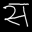

In [69]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/shrunk5.png')
test_image

In [70]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_32_patalosaw


### The model fails when white character and black background colours are interchanged

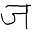

In [73]:
test_image=open_image('/content/drive/My Drive/Colab/DevanagariHandwrittenCharacterDataset/devanagari-alphabet-ja2.png')
test_image

In [74]:
pred_class, pred_idx, outputs = learn.predict(test_image)
print(pred_class)

character_31_petchiryakha


### So, next step could be converting the user uploaded image into one with black background and white characters before prediction